# Education

Importando as bibliotecas

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Lendo o arquivo tratado

In [7]:
df = pd.read_csv('combined_WID_cleaned.csv')
df.head()

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
0,p0p100,1917,1168229.0,New Jersey,Population,Population,tax unit,Adults,population
1,p0p100,1918,1178440.0,New Jersey,Population,Population,tax unit,Adults,population
2,p0p100,1919,1204412.0,New Jersey,Population,Population,tax unit,Adults,population
3,p0p100,1920,1238146.0,New Jersey,Population,Population,tax unit,Adults,population
4,p0p100,1921,1279734.0,New Jersey,Population,Population,tax unit,Adults,population


Filtrando os resultados para:

- indicador  = Education: Primary, Education: Secondary, Education: Tertiary

- tipo = Average

In [17]:
df_edu = df.query("indicador in ['Education: Primary', 'Education: Secondary', 'Education: Tertiary', 'Consumption of fixed capital of households and NPISH', 'Final consumption expenditures'] and ano >= 1985 and tipo == 'Average' and idade == 'Adults'")
df_edu.head()

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
9965,p0p100,1995,8244.8,the British Virgin Islands,Final consumption expenditures,Average,individuals,Adults,USD
9966,p0p100,1996,8040.4,the British Virgin Islands,Final consumption expenditures,Average,individuals,Adults,USD
9967,p0p100,1997,8114.5,the British Virgin Islands,Final consumption expenditures,Average,individuals,Adults,USD
9968,p0p100,1998,8561.6,the British Virgin Islands,Final consumption expenditures,Average,individuals,Adults,USD
9969,p0p100,1999,8351.9,the British Virgin Islands,Final consumption expenditures,Average,individuals,Adults,USD


## 1 - Comparando todos os paises

In [18]:
unique_indicators = df_edu['indicador'].unique()

for indicator in unique_indicators:
    df_filtered = df_edu[df_edu['indicador'] == indicator]
    
    fig = px.line(df_filtered, 
                  x='ano', 
                  y='valor', 
                  color='pais', 
                  title=f"{indicator}",
                  labels={
                      "ano": "Ano",
                      "pais": "País"
                  })
    
    fig.show()


## 2 - Filtrando por alguns paises em espeficico

In [20]:
paises = ['Brazil', 'China', 'France', 'the USA', 'Canada', 'Japan', 'Mexico', 'Australia', 'India', 'Sweden', 'Israel']

In [21]:
df_paises_espec = df_edu.query(f'pais in {paises}')
df_paises_espec['pais'].unique()

array(['Mexico', 'Canada', 'Brazil', 'India', 'Israel', 'France', 'Japan',
       'Sweden', 'China', 'the USA', 'Australia'], dtype=object)

### Agrupando por Indicadores

In [22]:
unique_indicators = df_paises_espec['indicador'].unique()

for indicator in unique_indicators:
    df_filtered = df_paises_espec[df_paises_espec['indicador'] == indicator]
    
    fig = px.line(df_filtered, 
                  x='ano', 
                  y='valor', 
                  color='pais', 
                  title=f"{indicator}",
                  labels={
                      "ano": "Ano",
                      "pais": "País"
                  })
    
    fig.show()


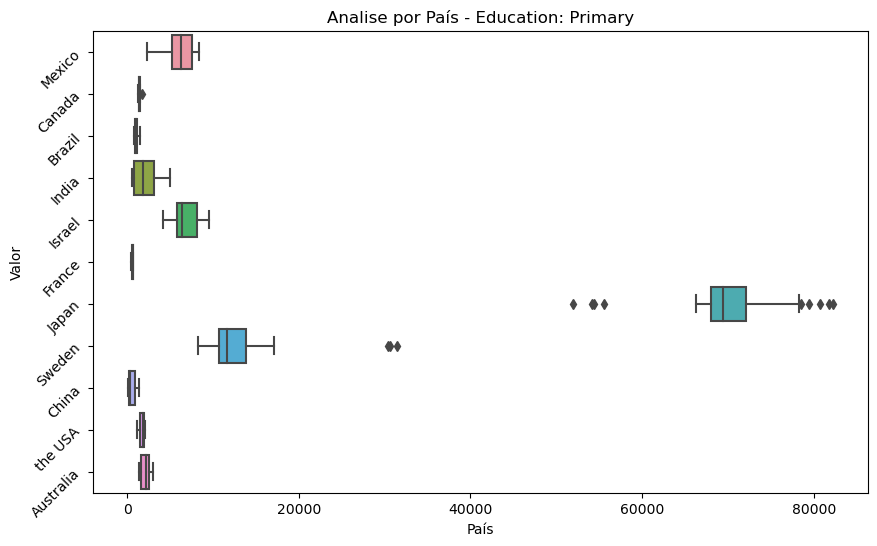

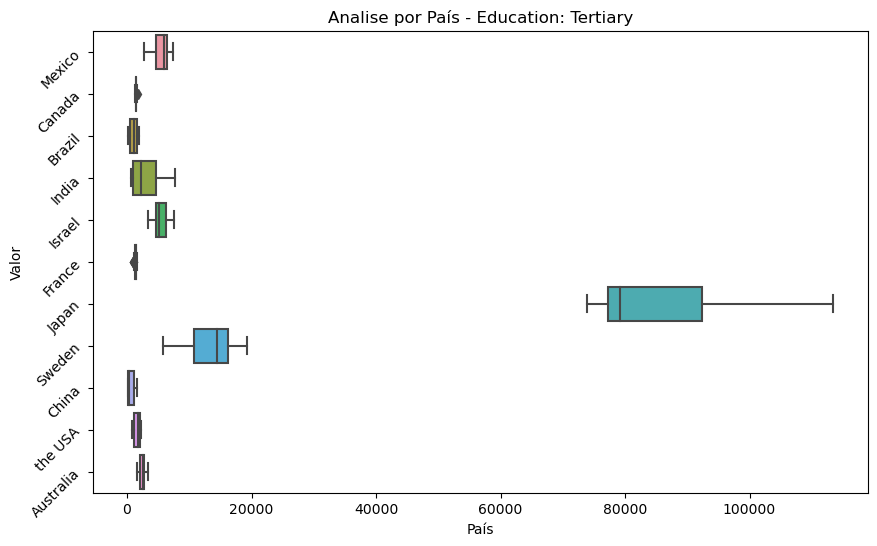

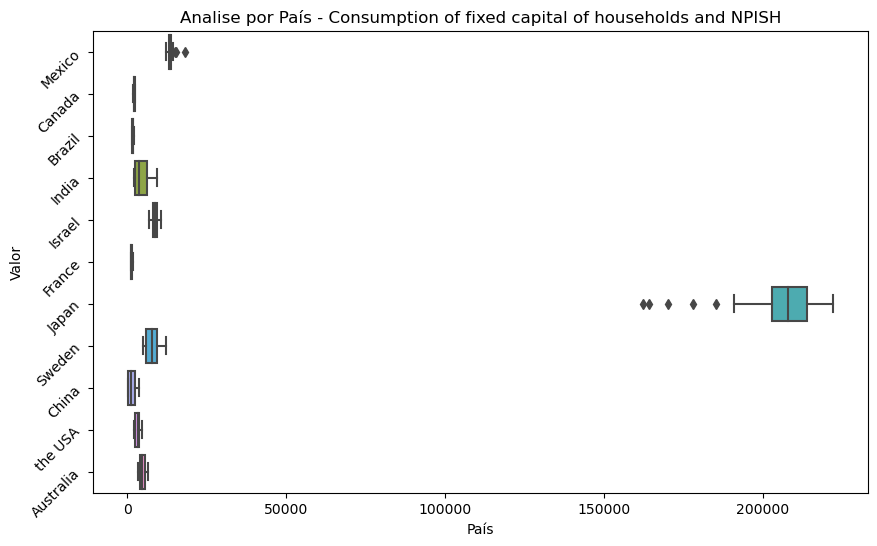

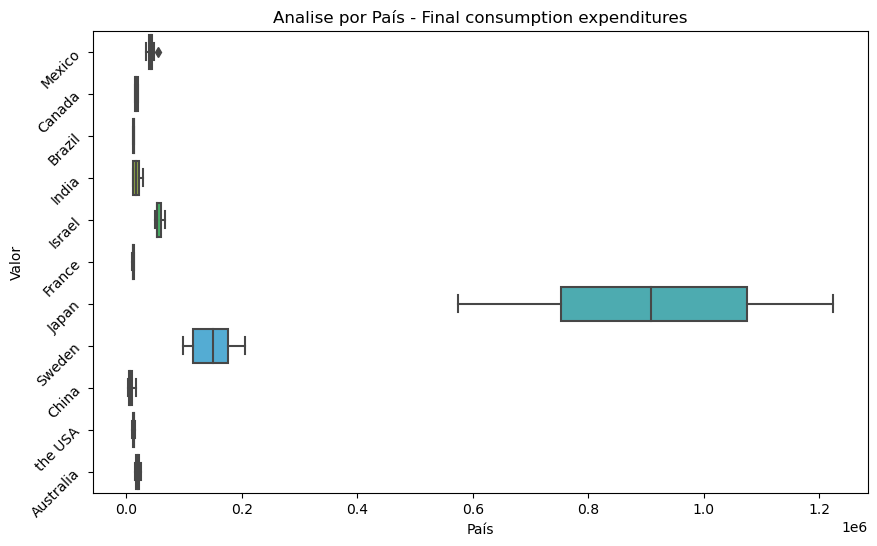

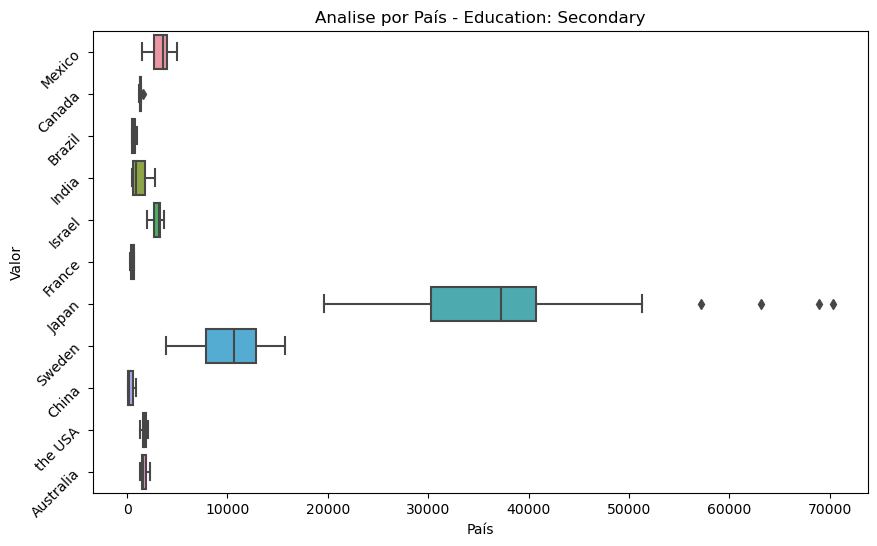

In [24]:
unique_indicators = df_paises_espec['indicador'].unique()

for indicator in unique_indicators:
    df_filtered = df_paises_espec[df_paises_espec['indicador'] == indicator]

    plt.figure(figsize=(10, 6)) 
    
    sns.boxplot(y='pais', x='valor', data=df_filtered)

    plt.yticks(rotation=45)

    plt.title(f'Analise por País - {indicator}')
    plt.xlabel('País')
    plt.ylabel('Valor')

    plt.show()


### Agrupando por Países

In [27]:
unique_countries = df_paises_espec['pais'].unique()

for country in unique_countries:
    df_filtered = df_edu[df_edu['pais'] == country]
    
    fig = px.line(df_filtered, 
                  x='ano', 
                  y='valor', 
                  color='indicador', 
                  title=f"Comparativo para o pais: {country}",
                  labels={
                      "ano": "Ano",
                      "indicador": "Indicadores"
                  })
    
    fig.show()


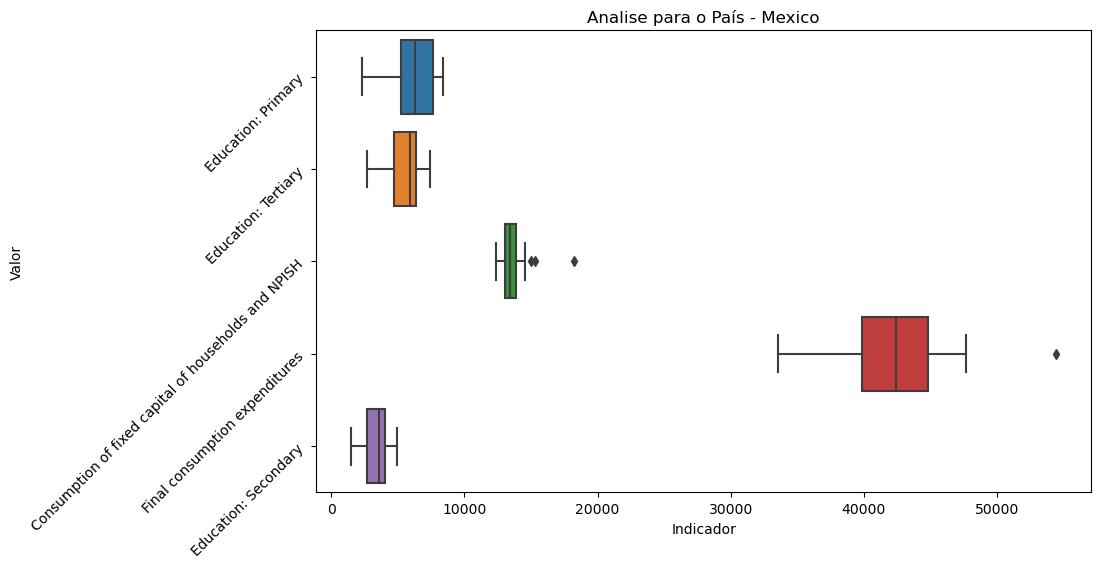

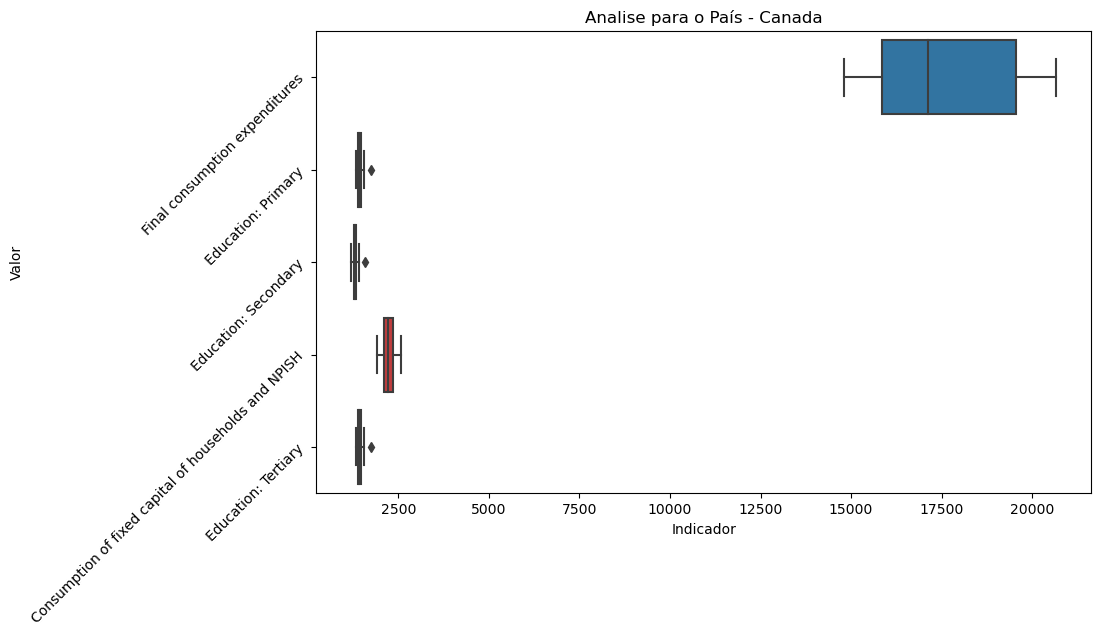

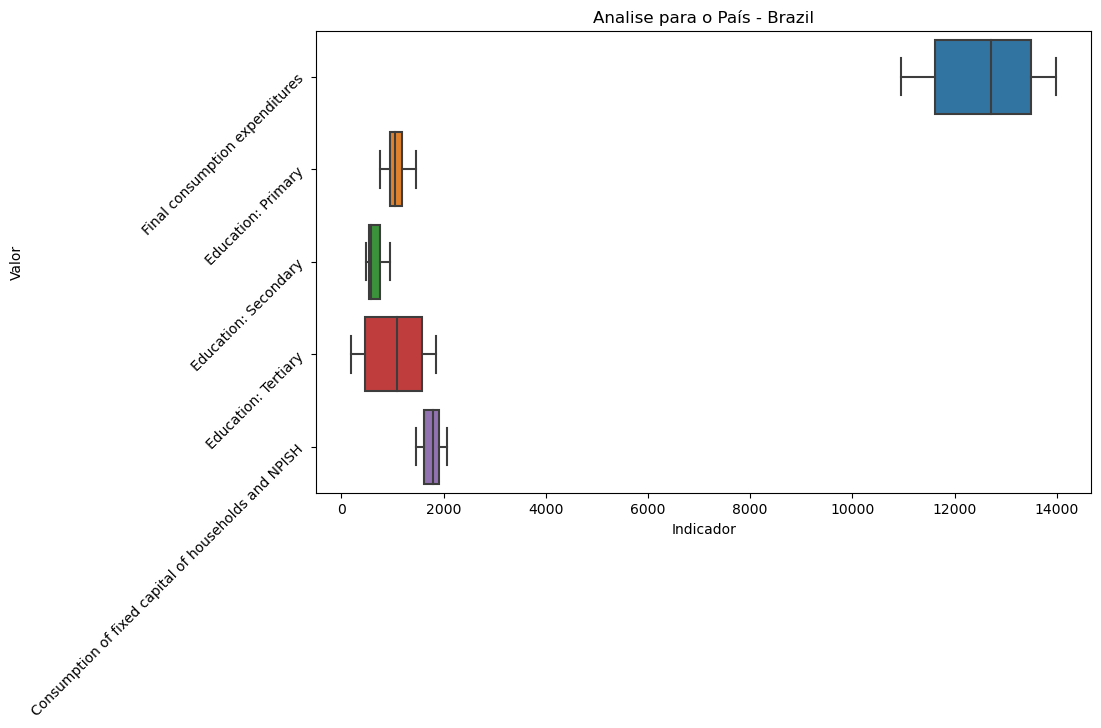

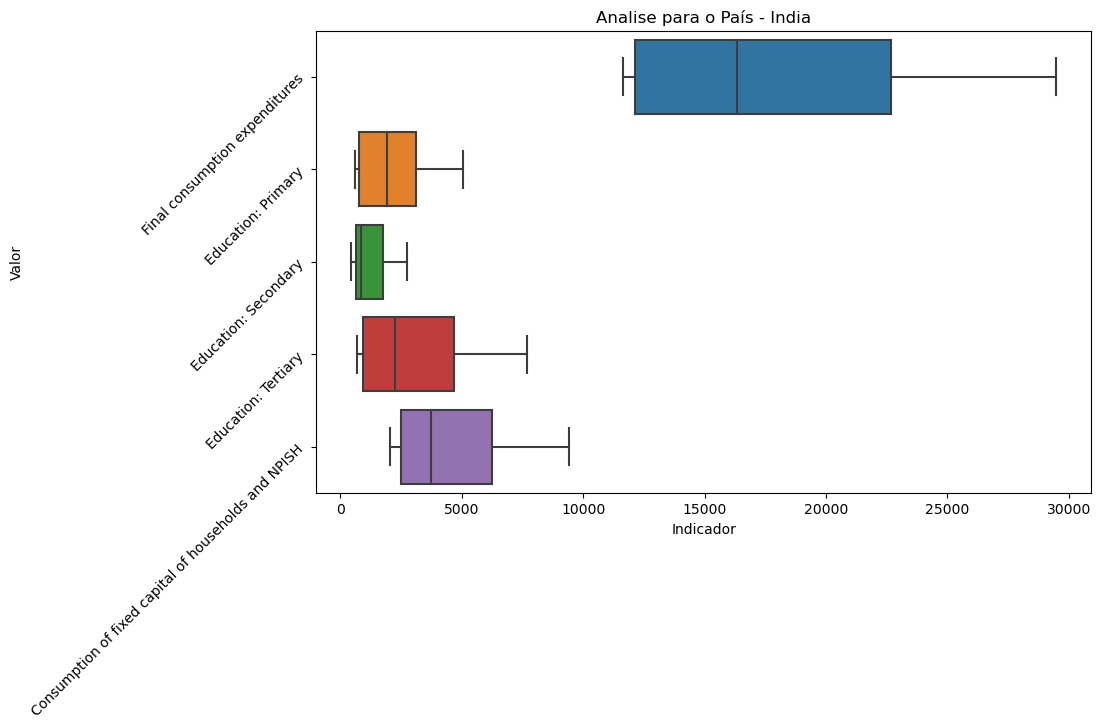

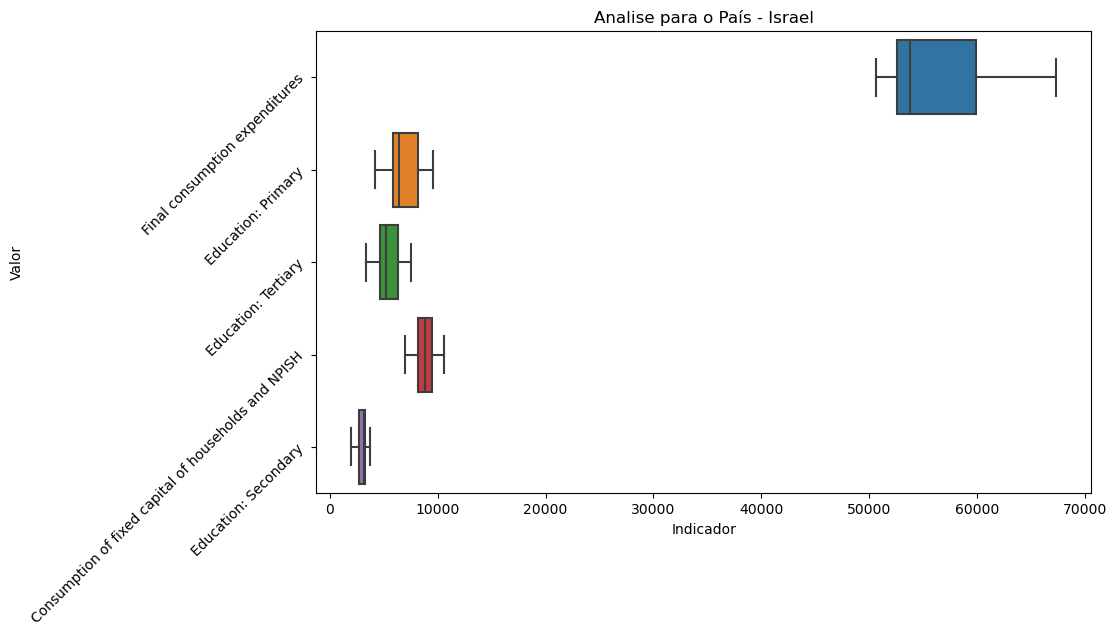

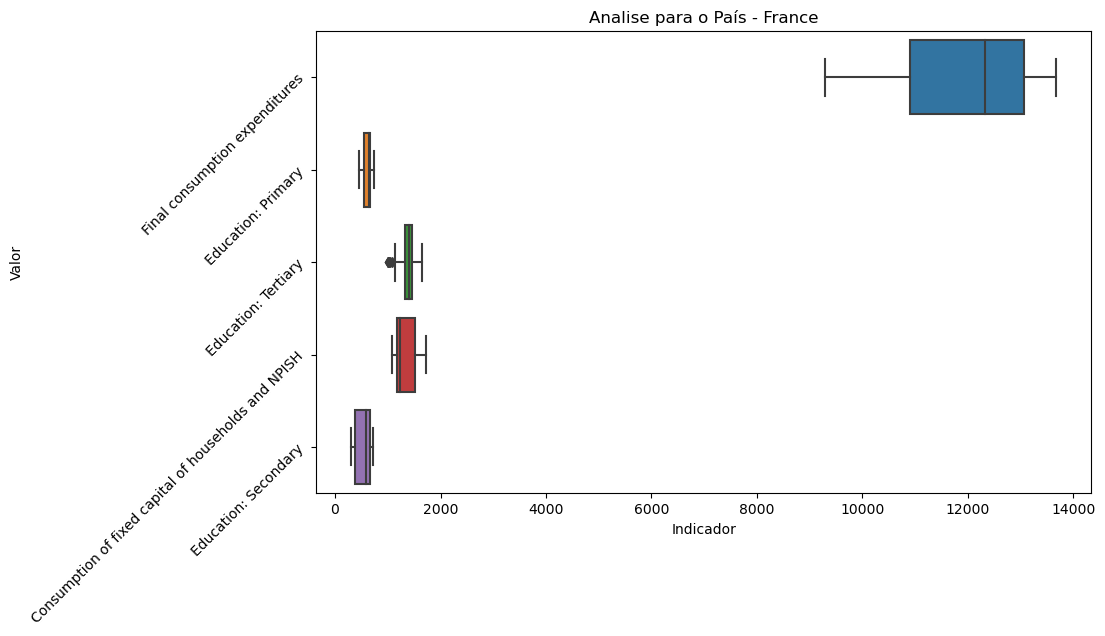

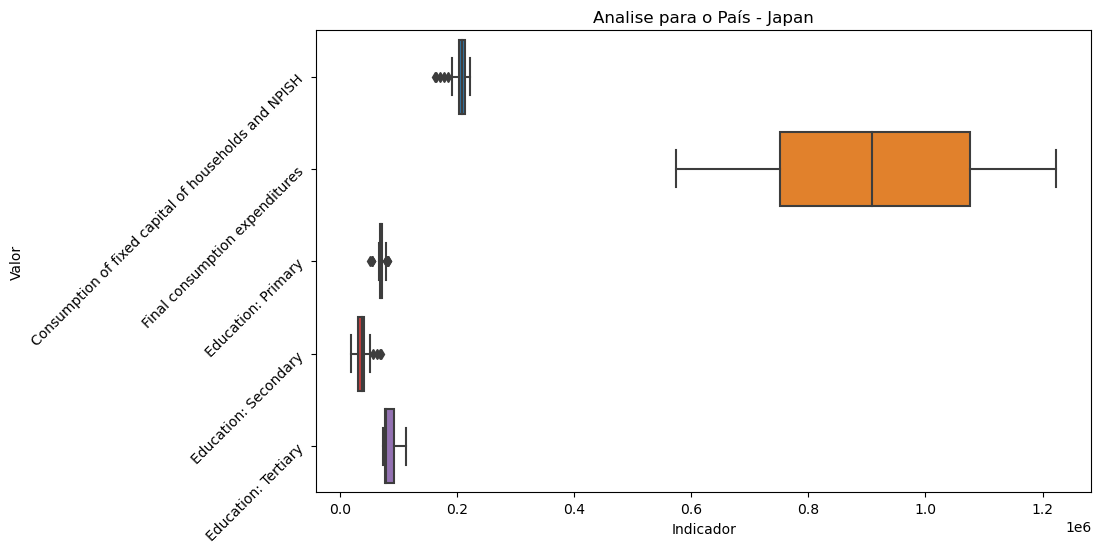

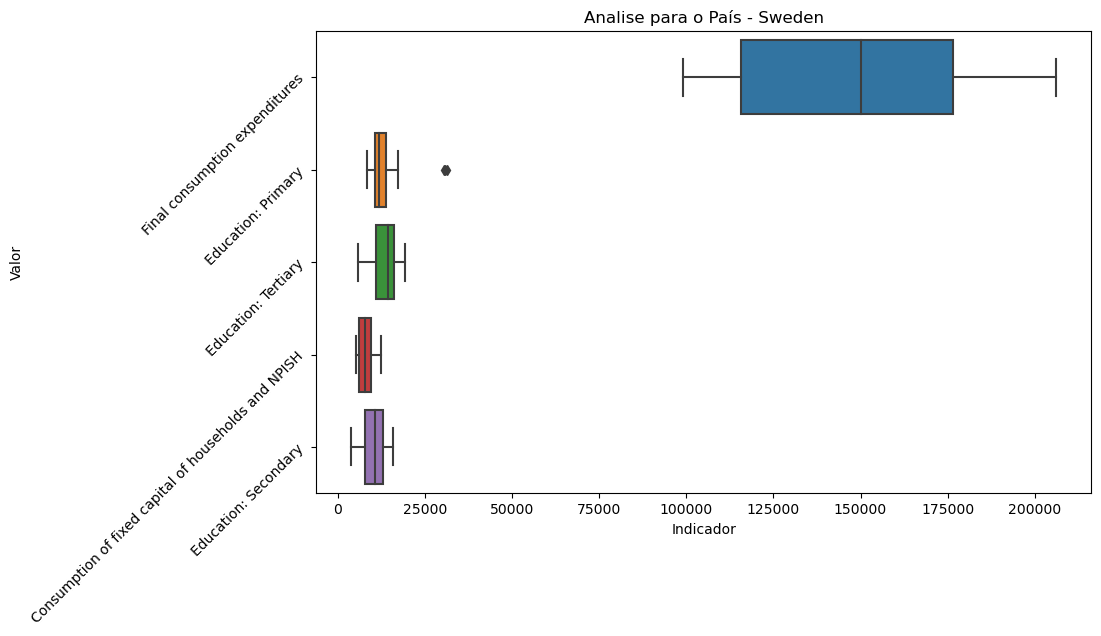

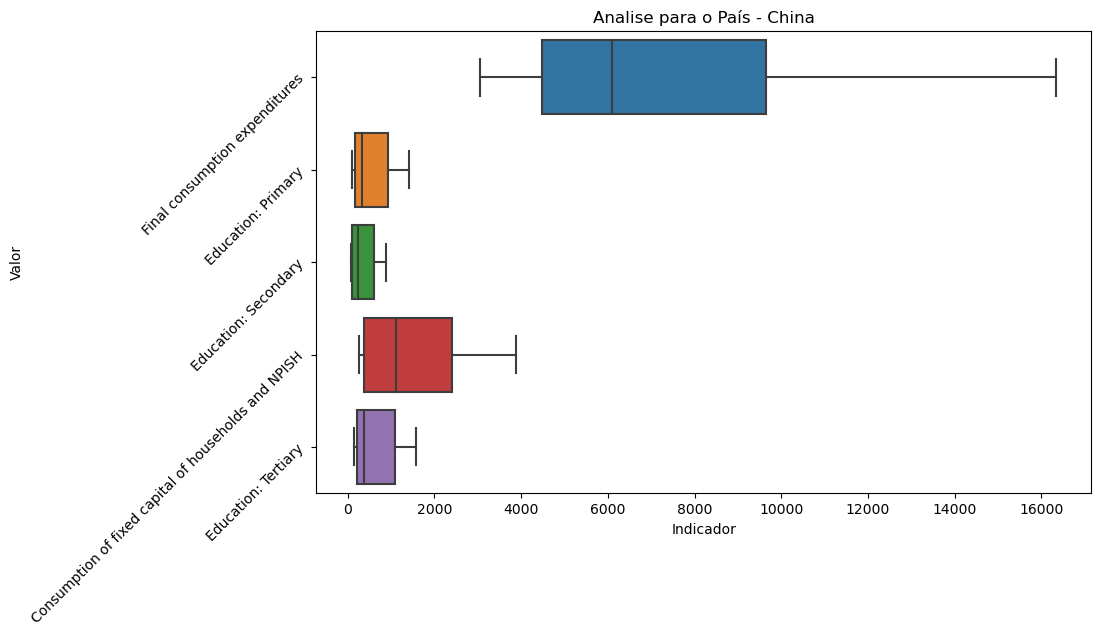

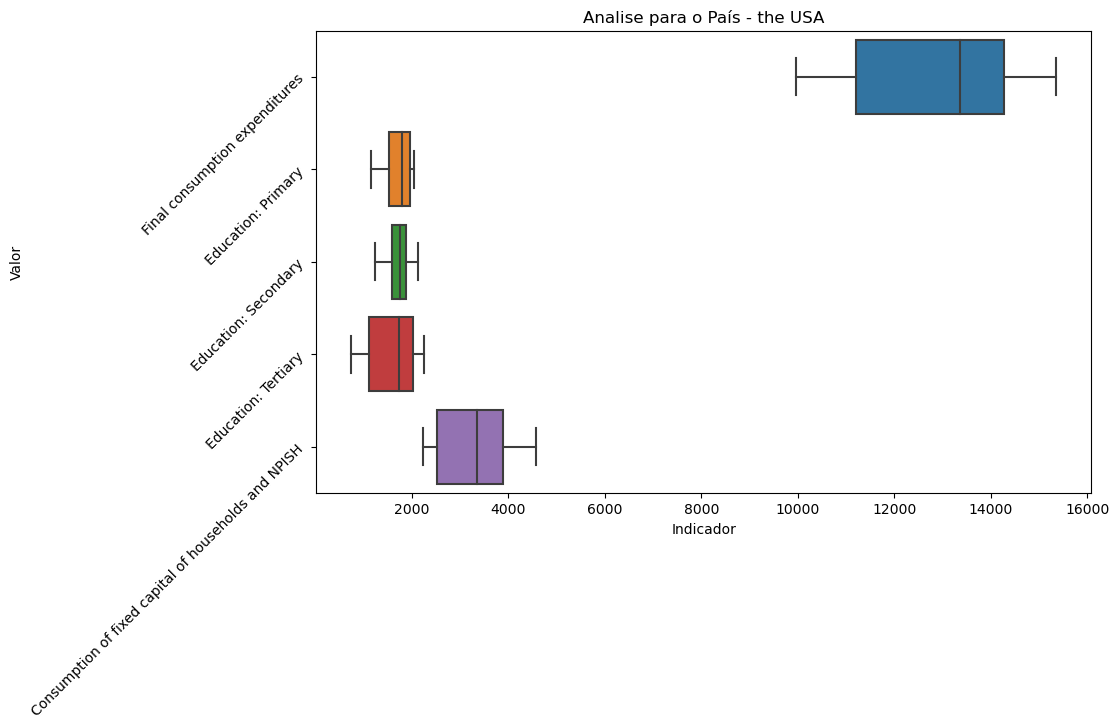

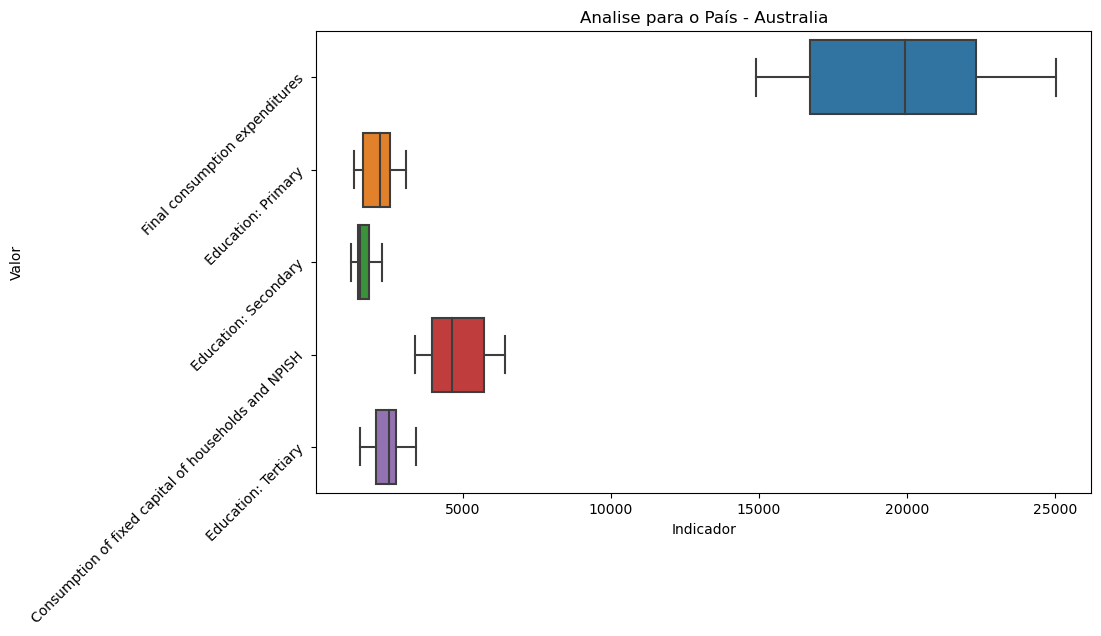

In [28]:
unique_countries = df_paises_espec['pais'].unique()

for country in unique_countries:
    df_filtered = df_edu[df_edu['pais'] == country]

    
    plt.figure(figsize=(10, 6)) 
    
    sns.boxplot(y='indicador', x='valor', data=df_filtered)

    plt.yticks(rotation=45)

    plt.title(f'Analise para o País - {country}')
    plt.xlabel('Indicador')
    plt.ylabel('Valor')

    plt.show()


### Focando apenas na educação

In [37]:
unique_countries = df_paises_espec['pais'].unique()
df_edu_only = df_edu.query("indicador in ['Education: Primary', 'Education: Secondary', 'Education: Tertiary']")

for country in unique_countries:
    try:
        df_filtered = df_edu_only[df_edu_only['pais'] == country]
        
        fig = px.line(df_filtered, 
                    x='ano', 
                    y='valor', 
                    color='indicador', 
                    title=f"Comparativo para o pais: {country}",
                    labels={
                        "ano": "Ano",
                        "indicador": "Indicadores"
                    })
        
        fig.show()
    except Exception as e:
        pass


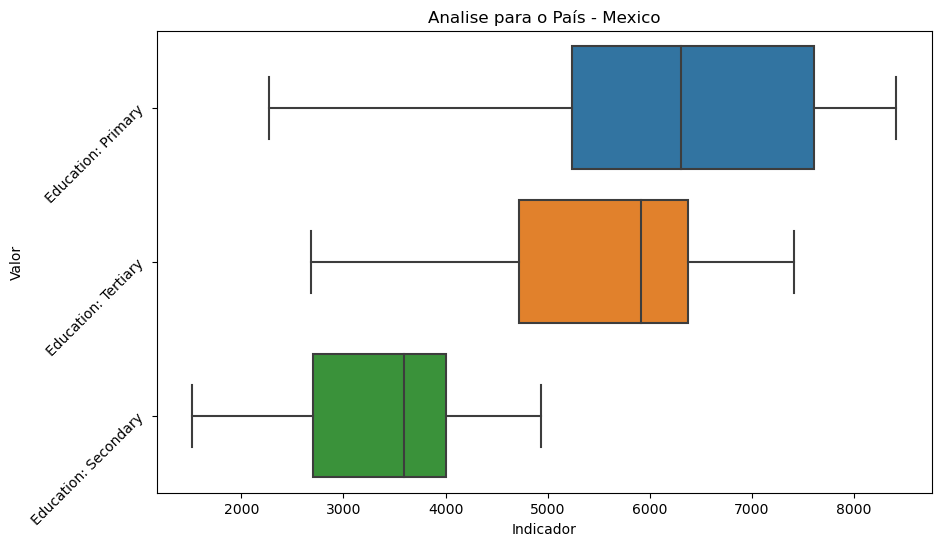

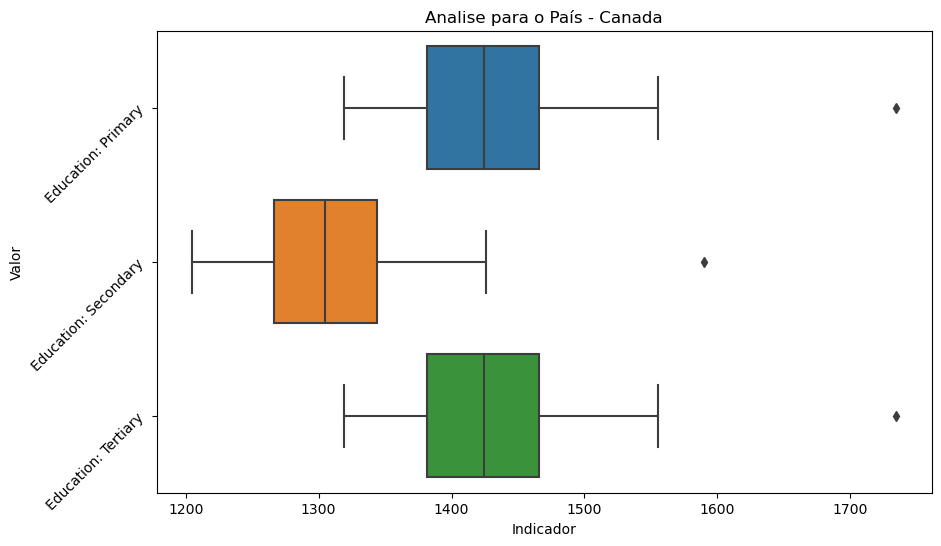

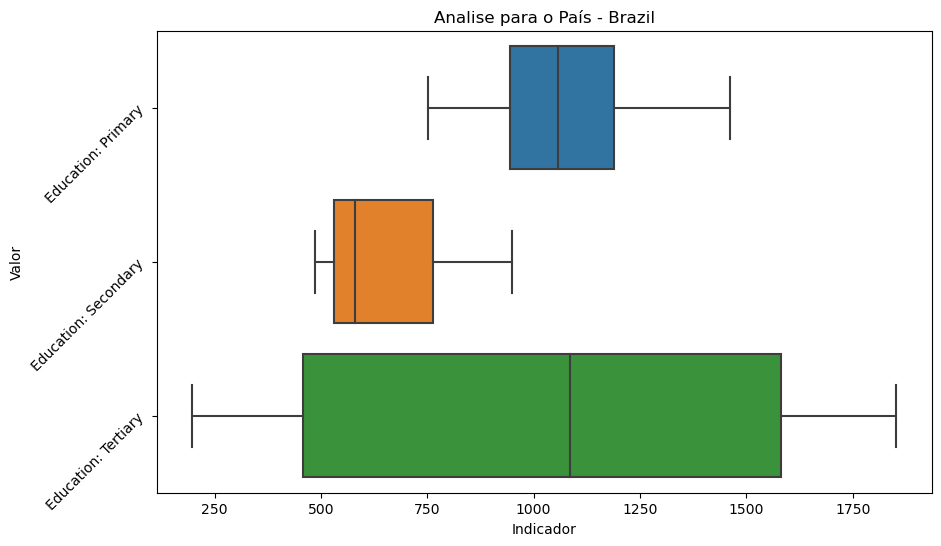

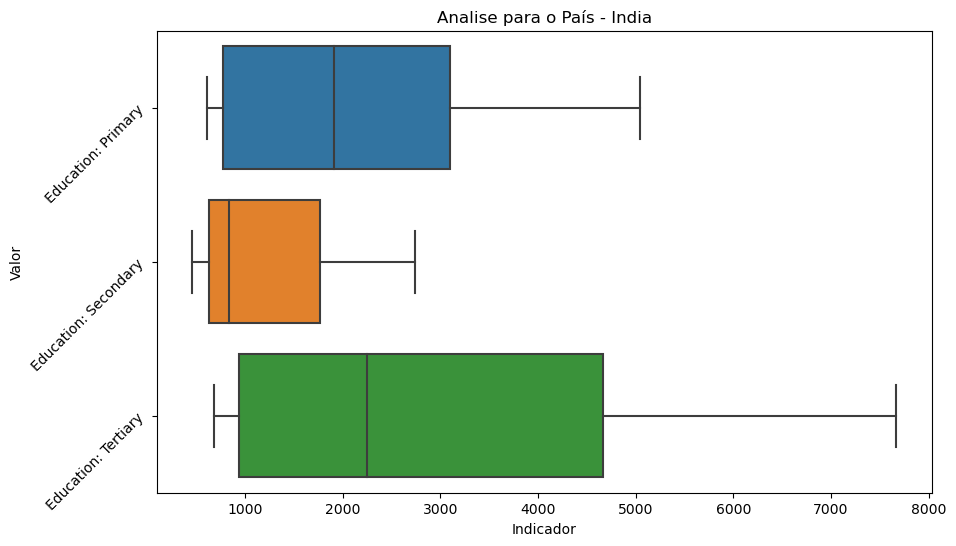

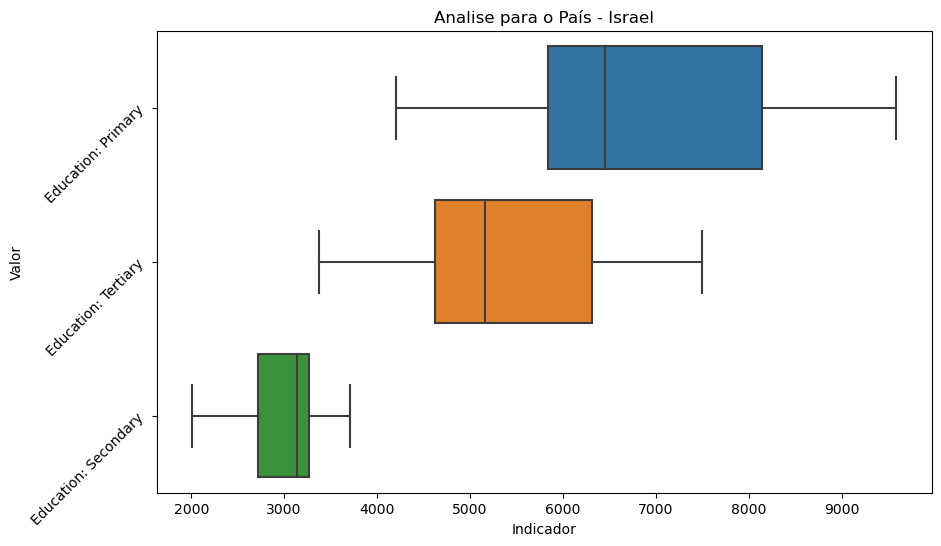

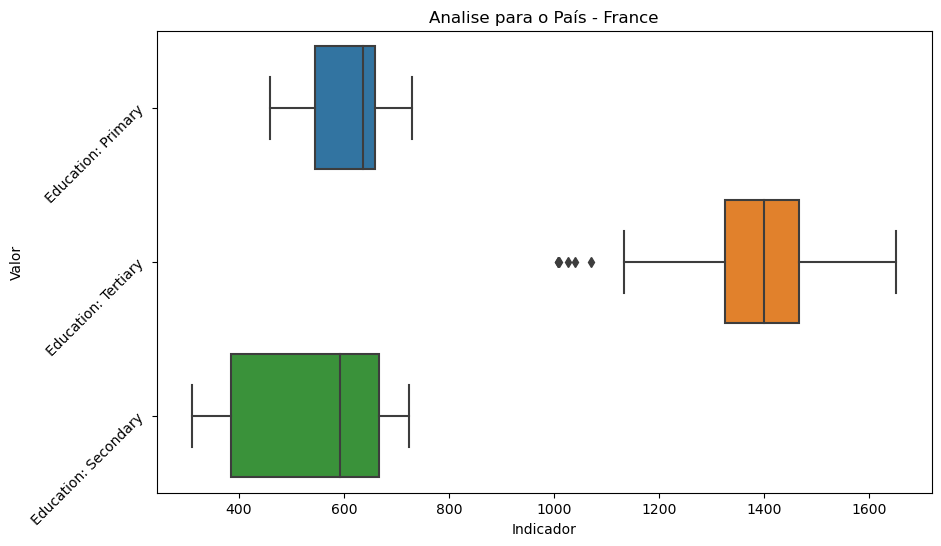

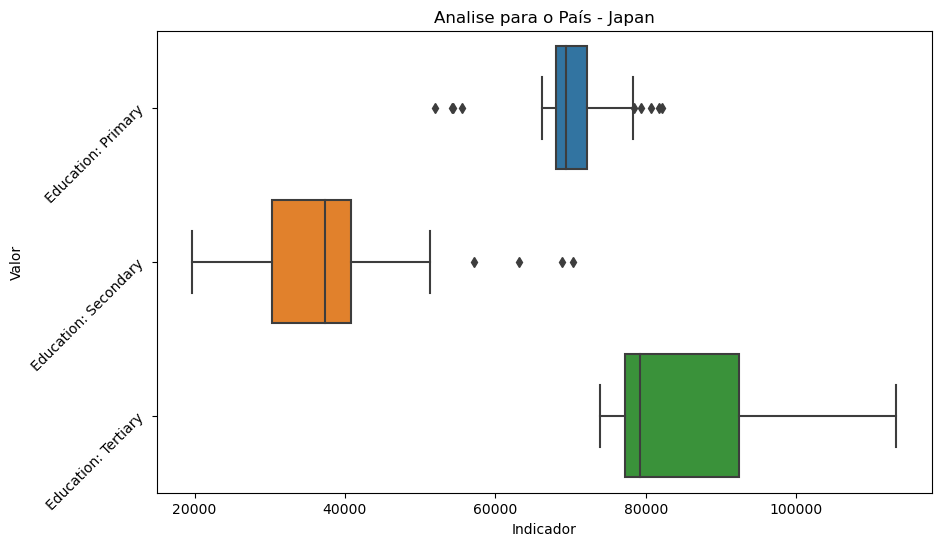

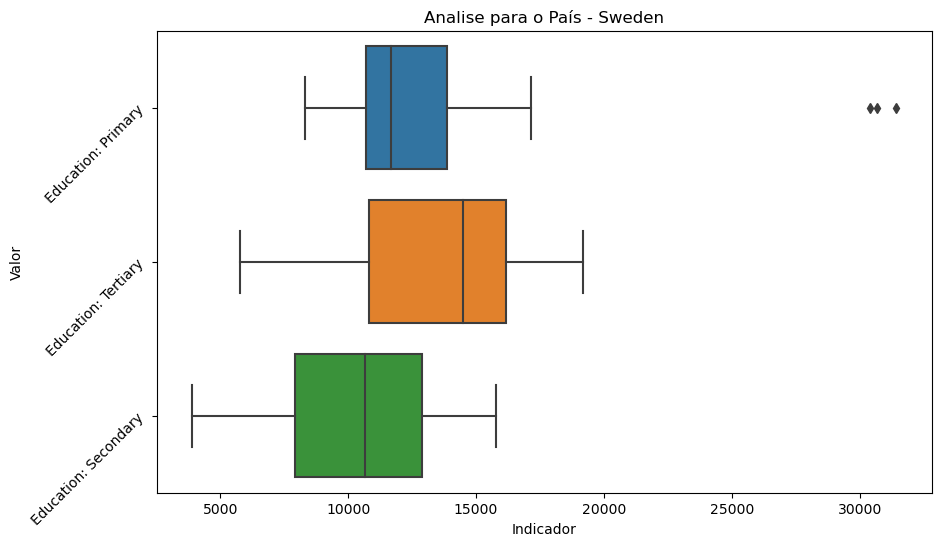

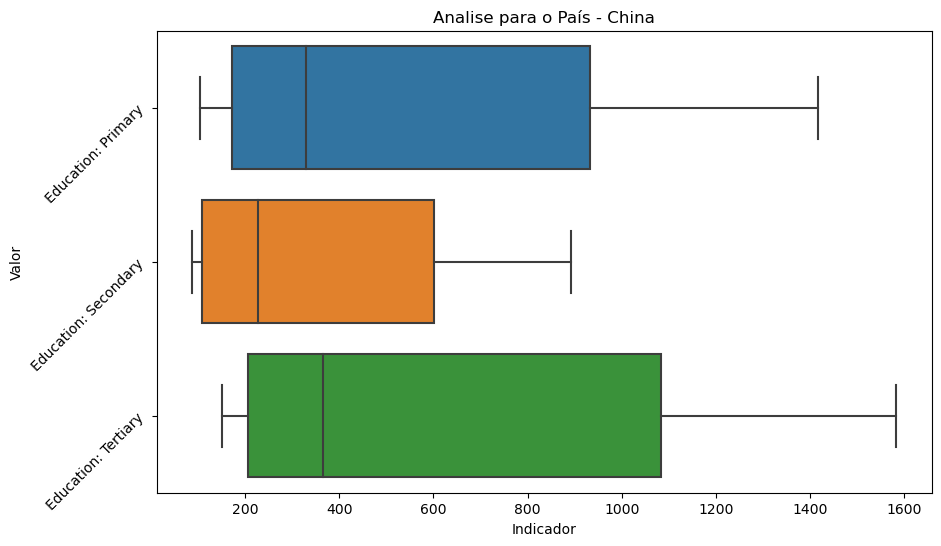

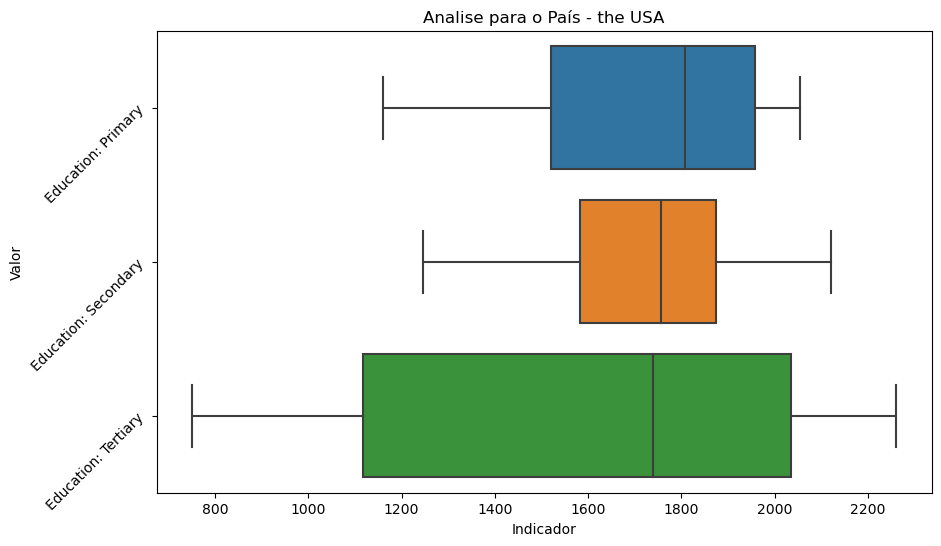

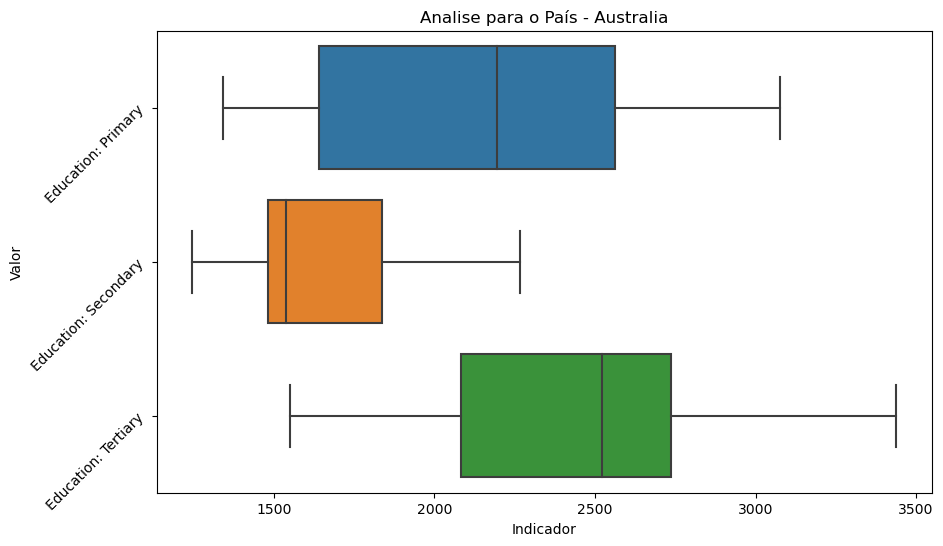

In [38]:
unique_countries = df_paises_espec['pais'].unique()
df_edu_only = df_edu.query("indicador in ['Education: Primary', 'Education: Secondary', 'Education: Tertiary']")

for country in unique_countries:
    df_filtered = df_edu_only[df_edu_only['pais'] == country]

    
    plt.figure(figsize=(10, 6)) 
    
    sns.boxplot(y='indicador', x='valor', data=df_filtered)

    plt.yticks(rotation=45)

    plt.title(f'Analise para o País - {country}')
    plt.xlabel('Indicador')
    plt.ylabel('Valor')

    plt.show()


## Conclusão

### 1. **Educação: Primária, Secundária e Terciária**
   
   - **Países desenvolvidos** como **França**, **EUA**, **Japão**, **Canadá**, **Suécia** e **Israel** geralmente apresentam altos níveis de investimento em educação, refletidos em taxas de escolaridade primária e secundária quase universais e uma significativa taxa de participação no ensino superior (terciário). Nestes países:
     - **Educação primária e secundária** são obrigatórias e acessíveis, com elevadas taxas de conclusão.
     - **Educação terciária** tem uma maior acessibilidade financeira através de políticas públicas, mas ainda assim, em alguns países, pode ser influenciada por disparidades socioeconômicas (como nos EUA, onde o acesso à educação superior pode ser mais restrito devido ao alto custo).
   
   - **Países emergentes** como **Brasil**, **México**, **China** e **Índia** apresentam desafios em garantir a universalidade e qualidade na educação primária e secundária, e enfrentam maiores obstáculos para ampliar o acesso à educação terciária. 
     - **Brasil** e **México** têm investido progressivamente em educação, mas ainda lutam com desigualdades regionais e sociais que afetam o acesso e a qualidade educacional.
     - **China** tem se destacado no crescimento da educação terciária, com um aumento significativo nas matrículas nas últimas décadas, resultando em uma força de trabalho mais qualificada.
     - **Índia** ainda enfrenta desafios na universalização da educação primária e secundária, especialmente em áreas rurais, e o acesso à educação terciária é limitado a uma parte da população.

   - **Países desenvolvidos de menor população**, como **Suécia** e **Israel**, também são conhecidos por altos investimentos em educação de alta qualidade, e suas políticas de bem-estar ajudam a manter o acesso e a equidade em todos os níveis educacionais.

### 2. **Consumo de Capital Fixo das Famílias e NPISH**

   O consumo de capital fixo das famílias e NPISH reflete o desgaste dos ativos de capital das famílias, como imóveis e bens duráveis, além do desgaste dos ativos de instituições que oferecem serviços às famílias sem fins lucrativos. Abaixo, algumas observações:
   
   - **Países desenvolvidos** como **EUA**, **França** e **Japão** têm um consumo de capital fixo das famílias maior devido à alta concentração de ativos de capital em imóveis e bens duráveis. Esses países têm economias mais maduras, com maiores níveis de consumo per capita e um estilo de vida mais baseado em bens de capital fixo (ex: casas e carros). O setor de **NPISH** nesses países também é mais desenvolvido, contribuindo para um consumo de capital fixo mais elevado.
   
   - **Países emergentes** como **Brasil**, **México** e **Índia** tendem a ter um consumo de capital fixo das famílias menor, pois uma parte significativa da população não possui acesso amplo a bens de capital durável. No entanto, o consumo desses bens está crescendo à medida que a classe média se expande nesses países.

   - **China** é um caso interessante, pois, embora seja um país emergente, o rápido crescimento econômico aumentou o consumo de capital fixo das famílias nas últimas décadas, especialmente com o grande investimento em imóveis e infraestrutura.

### 3. **Despesas de Consumo Final**
   
   - **EUA** e **China** Nos EUA, o consumo das famílias é a principal força motriz da economia, enquanto na China, embora as exportações e investimentos ainda sejam fundamentais, o consumo interno está se tornando mais importante à medida que a classe média cresce.
   
   - **Brasil**, **México** e **Índia** têm um crescimento nas despesas de consumo final, porém a desigualdade e a alta concentração de renda influenciam negativamente a distribuição desses gastos.
   
   - **Países como Suécia e Israel**, com menores populações, ainda apresentam altas despesas de consumo per capita, beneficiando-se de economias estáveis e políticas de bem-estar que incentivam o consumo familiar.

### **Comparações Regionais**
   
- **Américas (Brasil, México, EUA, Canadá)**:
  - **EUA** têm os maiores índices de educação terciária e consumo final entre os países das Américas, seguidos de **Canadá**. **Brasil** e **México** ainda estão em desenvolvimento, com desafios na educação terciária e uma maior desigualdade econômica que reflete no consumo de capital fixo.

- **Ásia (China, Japão, Índia)**:
  - **Japão** lidera em termos de qualidade e acesso à educação terciária e apresenta um consumo de capital fixo das famílias relativamente alto devido à sua economia avançada.
  - **China** está em ascensão, com rápido crescimento em educação terciária e consumo, enquanto **Índia** está atrás em termos de educação e infraestrutura de capital.

- **Europa (França, Suécia)**:
  - **França** e **Suécia** têm sistemas de educação altamente desenvolvidos e fortes políticas de bem-estar que permitem uma equidade maior no acesso aos serviços educacionais e de consumo final.



Os países desenvolvidos tendem a apresentar melhores resultados em termos de acesso universal à educação em todos os níveis, maior consumo de capital fixo e gastos de consumo final mais elevados, refletindo suas economias avançadas e políticas de bem-estar social. Países emergentes, embora em crescimento, ainda enfrentam desafios para alcançar a mesma universalidade no acesso à educação e melhorar o consumo de capital fixo das famílias, especialmente em áreas rurais e entre classes socioeconômicas mais baixas.